# Image Classification with CIFAR Dataset

It is an image classification project work. Image classification comes under the computer vision project category and is mostly used in digital image analysis. We can apply image classification for both supervised classification and unsupervised classification. In the supervised classification, we do train model on target class to classify the class correctly in new samples.  But we group the samples the cluster of images with similar properties in unsupervised classification. 
The goal of this project is to work on various approaches to solve the classification problem. I will also compare the results from the models to find an algorithm that works efficiently and produces better results.

For this project I am using CIFAR-10 dataset.

## Analyse to know our data

First we will start with understanding about our data like what different categories we have, how does the data look etc.

In [1]:
# import require libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

from keras import layers, models, regularizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load data now

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Copy for later usage
x_train_copy = x_train.copy
y_train_copy = y_train.copy
x_test_copy = x_test.copy
y_test_copy = y_test.copy

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Add class details as well
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']

In [ ]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
# Creating function to plot images from different categories
def disp_image(X, Y):
    pyplot.figure(figsize=(8,8))
    for i in range(0,16):
      pyplot.subplot(4,4,i+1)
      pyplot.xticks([])
      pyplot.yticks([])
      pyplot.grid(False)
      pyplot.imshow(X[i])
      pyplot.xlabel(class_names[Y[i][0]])
    # Plot data now
    pyplot.show()

Plot of a Subset of Images From the CIFAR-10 Dataset


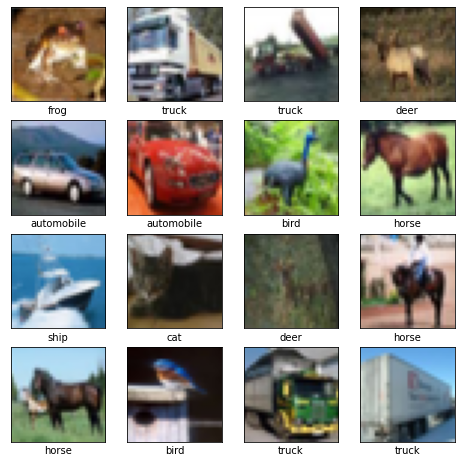

In [ ]:
# Show sample data now
print("Plot of a Subset of Images From the CIFAR-10 Dataset")
disp_image(x_train[:16], y_train[:16])

## Lets start with building our model for image classification


First start with basic VGG style CNN netork.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 128)        

Compile the model now to check the performance. Just tried 10 epoch for it.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_fitted = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8637 - accuracy: 0.2962 - val_loss: 1.2762 - val_accuracy: 0.5392
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1970 - accuracy: 0.5664 - val_loss: 1.0642 - val_accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9671 - accuracy: 0.6564 - val_loss: 0.9221 - val_accuracy: 0.6754
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8275 - accuracy: 0.7072 - val_loss: 0.8827 - val_accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7268 - accuracy: 0.7441 - val_loss: 0.8289 - val_accuracy: 0.7170
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6587 - accuracy: 0.7670 - val_loss: 0.8443 - val_accuracy: 0.7177
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.5933 - accuracy: 0.7909 - val_loss: 0.8047 -

From the basic model we got accuracy of 84.5% in training and 72.7 in testing. 

Lets plot the results to visualize the same.

In [3]:
def plot_result():
  pyplot.figure(figsize=(16,8))
  pyplot.subplot(1,2,1)
  pyplot.plot(model_fitted.model_fitted['loss'], label='loss')
  pyplot.plot(model_fitted.model_fitted['val_loss'], label = 'val_loss')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.title('Loss')
  pyplot.ylim([0.5, 1])
  pyplot.legend(loc='lower right')

  pyplot.subplot(1,2,2)
  pyplot.plot(model_fitted.model_fitted['accuracy'], label='accuracy')
  pyplot.plot(model_fitted.model_fitted['val_accuracy'], label = 'val_accuracy')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Accuracy')
  pyplot.title('Accuracy')
  pyplot.ylim([0.5, 1])
  pyplot.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.8690 - accuracy: 0.7278
0.7328000068664551


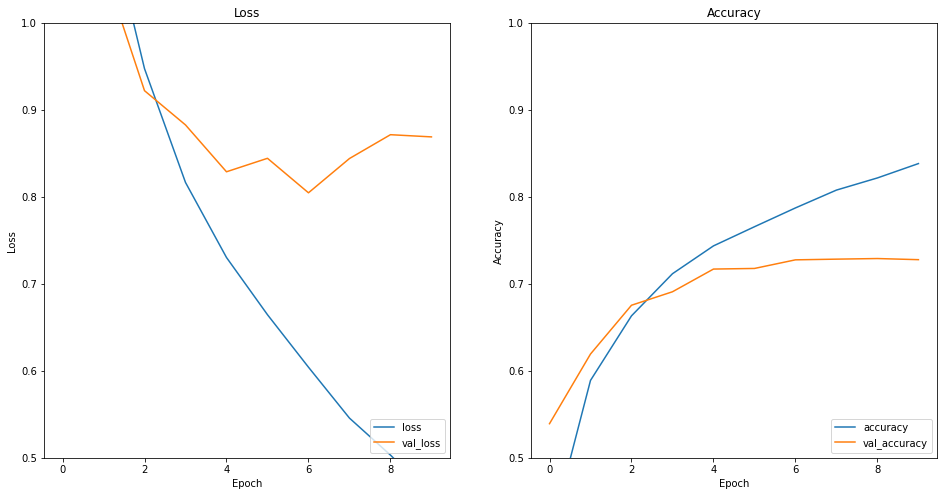

In [ ]:
plot_result()
print(test_acc)

From the above graph we can see that produced results are overfitting. we might need to modify this model to fix overfitting.


### Lets try Dropout regularization. 

Large weights in a neural network are a sign of a more complex network that has overfit the training data.Probabilistically dropping out nodes in the network is a simple and effective regularization method. A large network with more training and the use of a weight constraint are suggested when using dropout.

Initially we will start with same weight (0.2) in all dropouts. 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)         

This time I have increased echoch from 10 to 200.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_fitted = model.fit(x_train, y_train, epochs=200, 
                    validation_data=(x_test, y_test))

Epoch 1/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9459 - accuracy: 0.2859 - val_loss: 1.2419 - val_accuracy: 0.5570
Epoch 2/200
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1843 - accuracy: 0.5774 - val_loss: 0.9263 - val_accuracy: 0.6720
Epoch 3/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9394 - accuracy: 0.6684 - val_loss: 0.8365 - val_accuracy: 0.7042
Epoch 4/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8247 - accuracy: 0.7130 - val_loss: 0.8088 - val_accuracy: 0.7205
Epoch 5/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7527 - accuracy: 0.7383 - val_loss: 0.7085 - val_accuracy: 0.7577
Epoch 6/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6849 - accuracy: 0.7600 - val_loss: 0.7154 - val_accuracy: 0.7615
Epoch 7/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6433 - accuracy: 0.7727 - val_loss: 0.6925 -

313/313 - 1s - loss: 0.8193 - accuracy: 0.7986


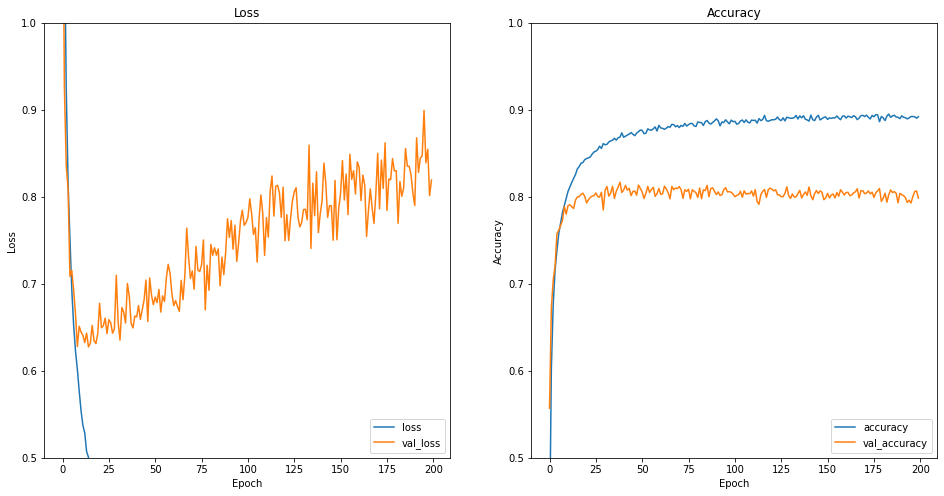

In [ ]:
plot_result()

We can see we are getting good results from the model but we do not see much change in overfit results. Lets try weight regularization now.

### Weight Regularization
Large weights in a neural network are a sign of a more complex network that has overfit the training data. Penalizing a network based on the size of the network weights during training can reduce overfitting. An L1 or L2 vector norm penalty can be added to the optimization of the network to encourage smaller weights.


I am using commonly used L2 regularization.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
# fit model
model_fitted = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/200
782/782 [==============================] - 39s 41ms/step - loss: 1.1483 - accuracy: 0.5912 - val_loss: 0.9618 - val_accuracy: 0.6625
Epoch 2/200
782/782 [==============================] - 31s 39ms/step - loss: 1.0335 - accuracy: 0.6346 - val_loss: 0.9354 - val_accuracy: 0.6670
Epoch 3/200
782/782 [==============================] - 30s 39ms/step - loss: 0.9474 - accuracy: 0.6702 - val_loss: 0.8184 - val_accuracy: 0.7163
Epoch 4/200
782/782 [==============================] - 32s 41ms/step - loss: 0.8817 - accuracy: 0.6936 - val_loss: 0.7528 - val_accuracy: 0.7360
Epoch 5/200
782/782 [==============================] - 32s 40ms/step - loss: 0.8361 - accuracy: 0.7109 - val_loss: 0.7136 - val_accuracy: 0.7514
Epoch 6/200
782/782 [==============================] - 33s 42ms/step - loss: 0.7946 - accuracy: 0.7250 - val_loss: 0.7564 - val_accuracy: 0.7396
Epoch 7/200
782/782 [==============================] - 32s 41ms/step - loss: 0.7609 - accuracy: 0.7380 - val_loss: 0.7006 - val_ac

We can see it did help us increasing the accuracy as well as reducing overfitting. Lets visualize the results.

313/313 - 3s - loss: 0.6166 - accuracy: 0.8310


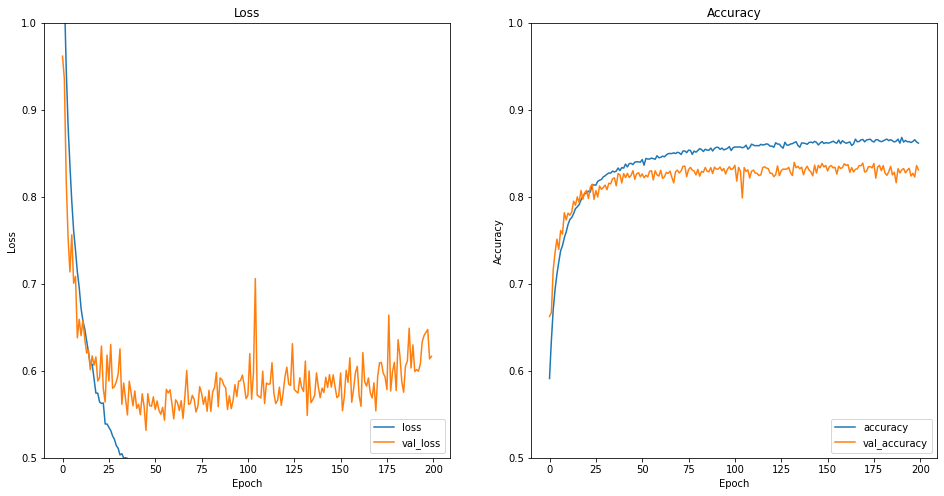

In [ ]:
plot_result()

We can easily find that result gap between training and test narrowed now. But these is still some gap. Let us try increasing weights in dropout this time.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# fit model
model_fitted = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/200
782/782 [==============================] - 54s 67ms/step - loss: 2.0403 - accuracy: 0.3527 - val_loss: 1.0892 - val_accuracy: 0.6133
Epoch 2/200
782/782 [==============================] - 49s 62ms/step - loss: 1.1506 - accuracy: 0.5899 - val_loss: 0.8941 - val_accuracy: 0.6837
Epoch 3/200
782/782 [==============================] - 49s 63ms/step - loss: 0.9385 - accuracy: 0.6680 - val_loss: 0.7654 - val_accuracy: 0.7314
Epoch 4/200
782/782 [==============================] - 49s 63ms/step - loss: 0.8177 - accuracy: 0.7121 - val_loss: 0.7296 - val_accuracy: 0.7445
Epoch 5/200
782/782 [==============================] - 49s 62ms/step - loss: 0.7387 - accuracy: 0.7459 - val_loss: 0.6525 - val_accuracy: 0.7708
Epoch 6/200
782/782 [==============================] - 49s 62ms/step - loss: 0.6735 - accuracy: 0.7663 - val_loss: 0.6506 - val_accuracy: 0.7749
Epoch 7/200
782/782 [==============================] - 49s 63ms/step - loss: 0.6142 - accuracy: 0.7880 - val_loss: 0.5985 - val_ac

313/313 - 3s - loss: 0.4929 - accuracy: 0.8804


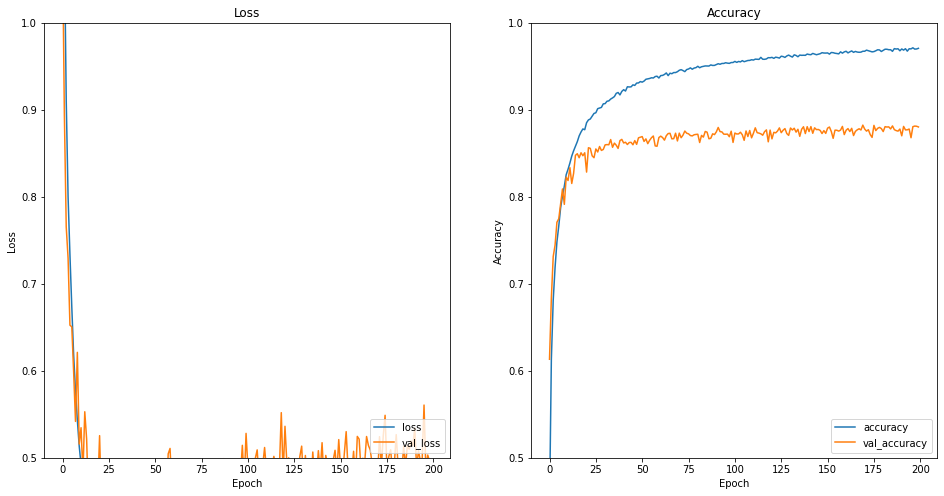

In [ ]:
plot_result()

Adding weights did not help fixing overfitting. We can see accuracy certaininly increase so do overfit results as well. We might need to try some other option now.


Lets try l2 regularization with 1.0e-4 learning rate now.


In [ ]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
# fit model
model_fitted = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/200
782/782 [==============================] - 11s 12ms/step - loss: 2.2609 - accuracy: 0.3746 - val_loss: 1.3548 - val_accuracy: 0.5551
Epoch 2/200
782/782 [==============================] - 9s 12ms/step - loss: 1.2284 - accuracy: 0.6009 - val_loss: 1.0152 - val_accuracy: 0.6659
Epoch 3/200
782/782 [==============================] - 9s 12ms/step - loss: 0.9662 - accuracy: 0.6861 - val_loss: 1.1059 - val_accuracy: 0.6683
Epoch 4/200
782/782 [==============================] - 9s 12ms/step - loss: 0.8448 - accuracy: 0.7315 - val_loss: 0.7728 - val_accuracy: 0.7509
Epoch 5/200
782/782 [==============================] - 9s 12ms/step - loss: 0.7418 - accuracy: 0.7656 - val_loss: 0.7806 - val_accuracy: 0.7691
Epoch 6/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6873 - accuracy: 0.7874 - val_loss: 0.9451 - val_accuracy: 0.7012
Epoch 7/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6556 - accuracy: 0.7993 - val_loss: 0.7082 - val_accuracy

313/313 - 1s - loss: 0.6945 - accuracy: 0.8606


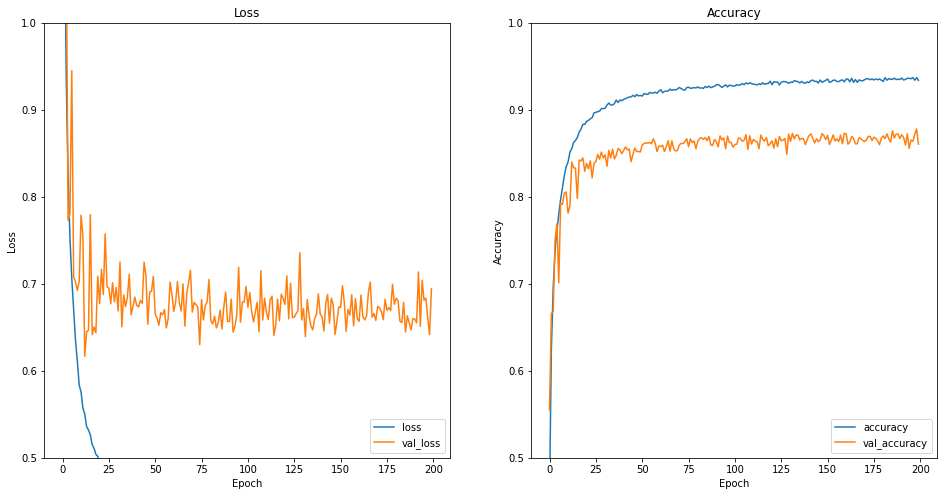

In [ ]:
plot_result()

From the graph we can see that it did not help us at all. We have almost similar results.

Now lets try data augmentation.

### Data augmentation

Data augmentation is the technique of increasing the size of data used for training a model. For reliable predictions, the deep learning models often require a lot of training data, which is not always available. Therefore, the existing data is augmented in order to make a better generalized model.

Goingforward instead of using sparse loss function we will work on using categorical loss function. So added some code to convert data in binary class matrix.

In [4]:
from keras.utils import to_categorical

xtrain = x_train_copy.astype('float32')
xtest = x_test_copy.astype('float32')
# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

First we will start with using pure CNN model. 

In [17]:
model = models.Sequential()
    
model.add(layers.Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)))    
model.add(layers.Dropout(0.2))
    
model.add(layers.Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
model.add(layers.Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
model.add(layers.Dropout(0.5))
    
model.add(layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
model.add(layers.Conv2D(192, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
model.add(layers.Dropout(0.5))    
    
model.add(layers.Conv2D(192, (3, 3), padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(192, (1, 1),padding='valid'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(10, (1, 1), padding='valid'))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Activation('softmax'))

model.summary()
    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 192)      

Lets create a data generator. Here I am using rotation, width & height shifting.

In [18]:

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(xtrain)

Now fit model with datagenerator

In [19]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [20]:
model_fitted = model.fit(datagen.flow(xtrain, ytrain, batch_size = 32),
                    steps_per_epoch = len(xtrain) / 32, # number of samples per gradient update
                    epochs = 200, # number of iterations
                    validation_data= (xtest, ytest),
                    verbose=1)

Epoch 1/200
1562/1562 [==============================] - 36s 22ms/step - loss: 2.0772 - accuracy: 0.2007 - val_loss: 1.8033 - val_accuracy: 0.3324
Epoch 2/200
1562/1562 [==============================] - 35s 22ms/step - loss: 1.7634 - accuracy: 0.3492 - val_loss: 1.5232 - val_accuracy: 0.4366
Epoch 3/200
1562/1562 [==============================] - 35s 22ms/step - loss: 1.6401 - accuracy: 0.3960 - val_loss: 1.5768 - val_accuracy: 0.4525
Epoch 4/200
1562/1562 [==============================] - 35s 22ms/step - loss: 1.5411 - accuracy: 0.4366 - val_loss: 1.3918 - val_accuracy: 0.4949
Epoch 5/200
1562/1562 [==============================] - 35s 22ms/step - loss: 1.4711 - accuracy: 0.4640 - val_loss: 1.3568 - val_accuracy: 0.5140
Epoch 6/200
1562/1562 [==============================] - 35s 23ms/step - loss: 1.4101 - accuracy: 0.4870 - val_loss: 1.4842 - val_accuracy: 0.5009
Epoch 7/200
1562/1562 [==============================] - 35s 23ms/step - loss: 1.3770 - accuracy: 0.5002 - val_loss: 1

KeyboardInterrupt: ignored

In [ ]:
plot_result()

From the visualization we can easily find that it did resolve our overfit issue with accuracy of 86% which is really very good.

Now lets try the same with our model with dropout and weight regularization. 

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(xtrain)

In [7]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [8]:
model_fitted = model.fit(datagen.flow(xtrain, ytrain, batch_size = 32),
                    steps_per_epoch = len(xtrain) / 32, # number of samples per gradient update
                    epochs = 200, # number of iterations
                    validation_data= (xtest, ytest),
                    verbose=1)

Epoch 1/200
1562/1562 [==============================] - 64s 20ms/step - loss: 2.8917 - accuracy: 0.1887 - val_loss: 1.7227 - val_accuracy: 0.3779
Epoch 2/200
1562/1562 [==============================] - 31s 20ms/step - loss: 2.1737 - accuracy: 0.2733 - val_loss: 1.6033 - val_accuracy: 0.4119
Epoch 3/200
1562/1562 [==============================] - 31s 20ms/step - loss: 1.9155 - accuracy: 0.3293 - val_loss: 1.6415 - val_accuracy: 0.4147
Epoch 4/200
1562/1562 [==============================] - 31s 20ms/step - loss: 1.7668 - accuracy: 0.3692 - val_loss: 1.7114 - val_accuracy: 0.4027
Epoch 5/200
1562/1562 [==============================] - 31s 20ms/step - loss: 1.6383 - accuracy: 0.4120 - val_loss: 1.7190 - val_accuracy: 0.3956
Epoch 6/200
1562/1562 [==============================] - 31s 20ms/step - loss: 1.5654 - accuracy: 0.4367 - val_loss: 1.6325 - val_accuracy: 0.4255
Epoch 7/200
1562/1562 [==============================] - 31s 20ms/step - loss: 1.5082 - accuracy: 0.4524 - val_loss: 1

313/313 - 1s - loss: 0.4961 - accuracy: 0.8336


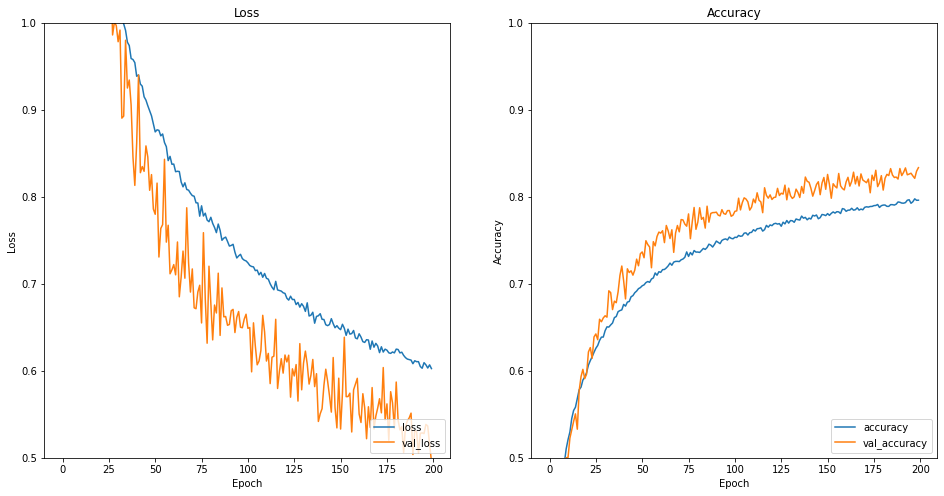

In [11]:
def plot_result():
  pyplot.figure(figsize=(16,8))
  pyplot.subplot(1,2,1)
  pyplot.plot(model_fitted.model_fitted['loss'], label='loss')
  pyplot.plot(model_fitted.model_fitted['val_loss'], label = 'val_loss')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.title('Loss')
  pyplot.ylim([0.5, 1])
  pyplot.legend(loc='lower right')

  pyplot.subplot(1,2,2)
  pyplot.plot(model_fitted.model_fitted['accuracy'], label='accuracy')
  pyplot.plot(model_fitted.model_fitted['val_accuracy'], label = 'val_accuracy')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Accuracy')
  pyplot.title('Accuracy')
  pyplot.ylim([0.5, 1])
  pyplot.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

plot_result()

Looks like when we apply dropout and weight regularization it does create the issue again. Lets try with increasing dropout weight.


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [13]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(xtrain)

In [14]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [15]:
model_fitted = model.fit(datagen.flow(xtrain, ytrain, batch_size = 32),
                    steps_per_epoch = len(xtrain) / 32, # number of samples per gradient update
                    epochs = 200, # number of iterations
                    validation_data= (xtest, ytest),
                    verbose=1)

Epoch 1/200
1562/1562 [==============================] - 29s 18ms/step - loss: 2.4793 - accuracy: 0.1403 - val_loss: 1.9476 - val_accuracy: 0.2939
Epoch 2/200
1562/1562 [==============================] - 28s 18ms/step - loss: 1.9806 - accuracy: 0.2576 - val_loss: 1.7183 - val_accuracy: 0.3878
Epoch 3/200
1562/1562 [==============================] - 29s 18ms/step - loss: 1.8425 - accuracy: 0.3182 - val_loss: 1.6488 - val_accuracy: 0.3953
Epoch 4/200
1562/1562 [==============================] - 28s 18ms/step - loss: 1.7560 - accuracy: 0.3534 - val_loss: 1.5152 - val_accuracy: 0.4488
Epoch 5/200
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6750 - accuracy: 0.3915 - val_loss: 1.4468 - val_accuracy: 0.4756
Epoch 6/200
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6236 - accuracy: 0.4086 - val_loss: 1.4673 - val_accuracy: 0.4691
Epoch 7/200
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5603 - accuracy: 0.4311 - val_loss: 1

313/313 - 1s - loss: 0.6455 - accuracy: 0.7990


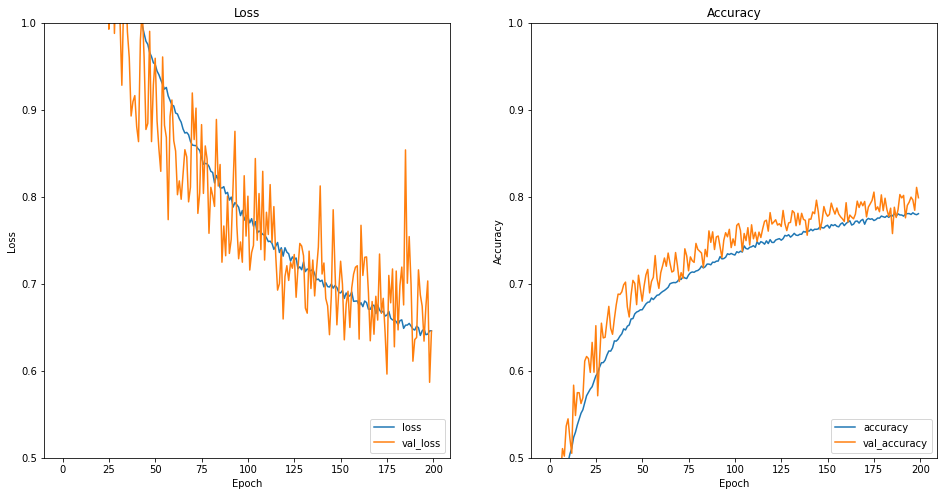

In [16]:
plot_result()

After increasing dropout weight it is performing better now and we can see consistant resilts not but sightly underfit this time.

Conclusion:

1. In this project I learned how do we work with image data and build model for image classification. 

2. While working on optimizing model, I learned different techniques which we can use to fir overfitting and underfitting scenarios.

3. I learned how do we apply dropout regularization, weight delay and data augmentation.

4. If we work casefully with these techniques we can produce results with excellent accuracy.

*Challenges faced:* 
1. While working on this dataset I did struggle with training models.
2. I could try more methods on working with neural networks and applying different optimization techninque but system limitation did not allow me to try those methods. 
